In [14]:
#%pip install pandas
#%pip install numpy
#%pip install matplotlib
#%pip install seaborn
#%pip install statsmodels.tsa.stattools
#%pip install plotly

In [15]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **RECOLECCIÓN Y LIMPIEZA DE DATOS**

In [16]:
# LEEMOS LOS DATOS
df = pd.read_csv('../data/raw/i_v.csv')
df

,ANO,FECHA,FECHA_ACCIDENTE,HORA,GRAVEDAD_ACCIDENTE,GRAVEDAD,MES,NUMCOMUNA,BARRIO,COMUNA
0,2014,9/27/2014,9/27/2014 13:20,13:20,Solo danos,0.0,9,1,Villa Guadalupe,Popular
1,2014,10/15/2014,10/15/2014 9:40,09:40,Solo danos,0.0,10,1,Popular,Popular
2,2014,07/12/2014,07/12/2014 21:19,21:19,Con heridos,0.5,7,1,Santo Domingo Savio No. 1,Popular
3,2014,7/16/2014,7/16/2014 19:40,19:40,Con heridos,0.5,7,1,Santo Domingo Savio No. 1,Popular
4,2014,7/20/2014,7/20/2014 11:00,11:00,Con heridos,0.5,7,1,Carpinelo,Popular
...,...,...,...,...,...,...,...,...,...,...
224049,2020,8/30/2020,8/30/2020 5:40,05:40,Con heridos,0.5,8,16,Cerro Nutibara,Belen
224050,2020,8/30/2020,8/30/2020 11:00,11:00,Con heridos,0.5,8,16,Las Playas,Belen
224051,2020,8/31/2020,8/31/2020 6:20,06:20,Con heridos,0.5,8,16,Altavista,Belen
224052,2020,8/31/2020,8/31/2020 13:30,13:30,Solo danos,0.0,8,16,San Bernardo,Belen


In [17]:
# CONOCEMOS LA INFORMACION DE LOS DATOS (TIPO, NULOS)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224054 entries, 0 to 224053
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ANO                 224054 non-null  int64  
 1   FECHA               224054 non-null  object 
 2   FECHA_ACCIDENTE     224054 non-null  object 
 3   HORA                224054 non-null  object 
 4   GRAVEDAD_ACCIDENTE  224054 non-null  object 
 5   GRAVEDAD            224054 non-null  float64
 6   MES                 224054 non-null  int64  
 7   NUMCOMUNA           224054 non-null  int64  
 8   BARRIO              224044 non-null  object 
 9   COMUNA              224054 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 17.1+ MB


In [18]:
#OBSERVAMOS CANTIDAD DE DATOS NULOS
df.isnull().sum()

ANO                    0
FECHA                  0
FECHA_ACCIDENTE        0
HORA                   0
GRAVEDAD_ACCIDENTE     0
GRAVEDAD               0
MES                    0
NUMCOMUNA              0
BARRIO                10
COMUNA                 0
dtype: int64

In [19]:
#ELIMINAMOS REGISTROS DUPLICADOS
df = df.drop_duplicates()

In [20]:
#ELIMINAMOS LA COLUMNA BARRIO PORQUE TIENE BARRIOS NUMERICOS QUE NO SE CONOCEN
df = df.drop(['BARRIO'], axis=1)

In [21]:
#OBSERVAMOS LOS PRIMEROS 5 REGISTROS
df.head()

,ANO,FECHA,FECHA_ACCIDENTE,HORA,GRAVEDAD_ACCIDENTE,GRAVEDAD,MES,NUMCOMUNA,COMUNA
0,2014,9/27/2014,9/27/2014 13:20,13:20,Solo danos,0.0,9,1,Popular
1,2014,10/15/2014,10/15/2014 9:40,09:40,Solo danos,0.0,10,1,Popular
2,2014,07/12/2014,07/12/2014 21:19,21:19,Con heridos,0.5,7,1,Popular
3,2014,7/16/2014,7/16/2014 19:40,19:40,Con heridos,0.5,7,1,Popular
4,2014,7/20/2014,7/20/2014 11:00,11:00,Con heridos,0.5,7,1,Popular


In [22]:
#EXTRAEMOS LA HORA SIN LOS MINUTOS Y CREAMOS NUEVA COLUMNA
df['H_HORA'] = pd.to_datetime(df['HORA'], format='%H:%M', errors='coerce').dt.hour
df = df.dropna()
df

,ANO,FECHA,FECHA_ACCIDENTE,HORA,GRAVEDAD_ACCIDENTE,GRAVEDAD,MES,NUMCOMUNA,COMUNA,H_HORA
0,2014,9/27/2014,9/27/2014 13:20,13:20,Solo danos,0.0,9,1,Popular,13.0
1,2014,10/15/2014,10/15/2014 9:40,09:40,Solo danos,0.0,10,1,Popular,9.0
2,2014,07/12/2014,07/12/2014 21:19,21:19,Con heridos,0.5,7,1,Popular,21.0
3,2014,7/16/2014,7/16/2014 19:40,19:40,Con heridos,0.5,7,1,Popular,19.0
4,2014,7/20/2014,7/20/2014 11:00,11:00,Con heridos,0.5,7,1,Popular,11.0
...,...,...,...,...,...,...,...,...,...,...
224049,2020,8/30/2020,8/30/2020 5:40,05:40,Con heridos,0.5,8,16,Belen,5.0
224050,2020,8/30/2020,8/30/2020 11:00,11:00,Con heridos,0.5,8,16,Belen,11.0
224051,2020,8/31/2020,8/31/2020 6:20,06:20,Con heridos,0.5,8,16,Belen,6.0
224052,2020,8/31/2020,8/31/2020 13:30,13:30,Solo danos,0.0,8,16,Belen,13.0


In [23]:
#AGRUPAMOS LOS DATOS POR HORA DEL ACCIDENTE Y LOS ESTABLECEMOS COMO MOMENTO DEL DIA

rangos = [-1, 5.0, 11.0, 18.0, 24.0]
momento = ['Madrugada', 'Manana', 'Tarde', 'Noche']

# Se crea nueva columna
df['MOMENTO'] = pd.cut(df['H_HORA'],rangos, labels = momento)
print(df['MOMENTO'].unique())

['Tarde', 'Manana', 'Noche', 'Madrugada']
Categories (4, object): ['Madrugada' < 'Manana' < 'Tarde' < 'Noche']


In [24]:
#CONVERTIMOS LA COLUMNA FECHA EN TIPO TEMPORAL
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%m/%d/%Y', errors='coerce')
df = df.dropna()

In [25]:
#OBERVAMOS INFORMACION DE LOS DATOS Y CONFIRMAMOS QUE LA COLUMNA FECHA SEA DE DATOS TEMPORAL(datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223204 entries, 0 to 224053
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ANO                 223204 non-null  int64         
 1   FECHA               223204 non-null  datetime64[ns]
 2   FECHA_ACCIDENTE     223204 non-null  object        
 3   HORA                223204 non-null  object        
 4   GRAVEDAD_ACCIDENTE  223204 non-null  object        
 5   GRAVEDAD            223204 non-null  float64       
 6   MES                 223204 non-null  int64         
 7   NUMCOMUNA           223204 non-null  int64         
 8   COMUNA              223204 non-null  object        
 9   H_HORA              223204 non-null  float64       
 10  MOMENTO             223204 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 18.9+ MB


In [26]:
#ORDENAMOS EL DATASET DE ACUERDO A LA FECHA
df = df.sort_values(by='FECHA', ascending=True)

In [27]:
#OBSERVAMOS FECHA MINIMA Y MAXIMA
df['FECHA'].min(), df['FECHA'].max()

(Timestamp('2014-07-04 00:00:00'), Timestamp('2020-08-31 00:00:00'))

In [28]:
#ELIMINAMOS LOS REGISTROS EN LOS QUE LA LA COLUMNA 'COMUNA' TIENE EL DATO 'In'
df = df.loc[df['COMUNA'] != 'In']

In [29]:
# CREAMOS LA COLUMNA MESES 
meses ={1:'Enero', 2:'Febrero', 3:'Marzo',4:'Abril', 5:'Mayo', 6:'Junio', 7:'Julio', 8:'Agosto', 9:'Septiembre', 10:'Octubre', 11:'Noviembre', 12:'Deciembre'}
df['MES_NOMBRE'] = df['MES'].replace(meses)
df

,ANO,FECHA,FECHA_ACCIDENTE,HORA,GRAVEDAD_ACCIDENTE,GRAVEDAD,MES,NUMCOMUNA,COMUNA,H_HORA,MOMENTO,MES_NOMBRE
10155,2014,2014-07-04,07/04/2014 08:15,08:15,Solo danos,0.0,7,10,La Candelaria,8.0,Manana,Julio
17488,2014,2014-07-04,07/04/2014 23:35,23:35,Solo danos,0.0,7,15,Guayabal,23.0,Noche,Julio
10430,2014,2014-07-04,07/04/2014 19:00,19:00,Solo danos,0.0,7,10,La Candelaria,19.0,Noche,Julio
15573,2014,2014-07-04,07/04/2014 19:40,19:40,Solo danos,0.0,7,14,El Poblado,19.0,Noche,Julio
16844,2014,2014-07-04,07/04/2014 14:00,14:00,Solo danos,0.0,7,14,El Poblado,14.0,Tarde,Julio
...,...,...,...,...,...,...,...,...,...,...,...,...
212825,2020,2020-08-31,8/31/2020 7:55,07:55,Con heridos,0.5,8,8,Villa Hermosa,7.0,Manana,Agosto
217371,2020,2020-08-31,8/31/2020 9:00,09:00,Con heridos,0.5,8,10,La Candelaria,9.0,Manana,Agosto
217372,2020,2020-08-31,8/31/2020 11:10,11:10,Solo danos,0.0,8,10,La Candelaria,11.0,Manana,Agosto
217374,2020,2020-08-31,8/31/2020 12:30,12:30,Con heridos,0.5,8,10,La Candelaria,12.0,Tarde,Agosto


# **ANÁLISIS EXPLORATORIO Y VISUALIZACIÓN DE LOS DATOS**

**HISTOGRAMAS DE FRECUENCIA DE GRAVEDAD DE LOS ACCIDENTES Y COMUNA**

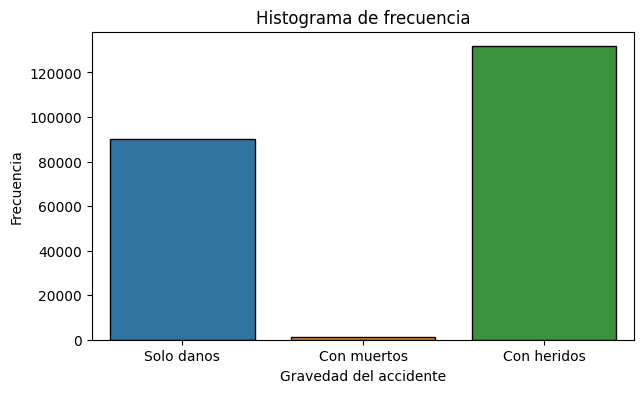

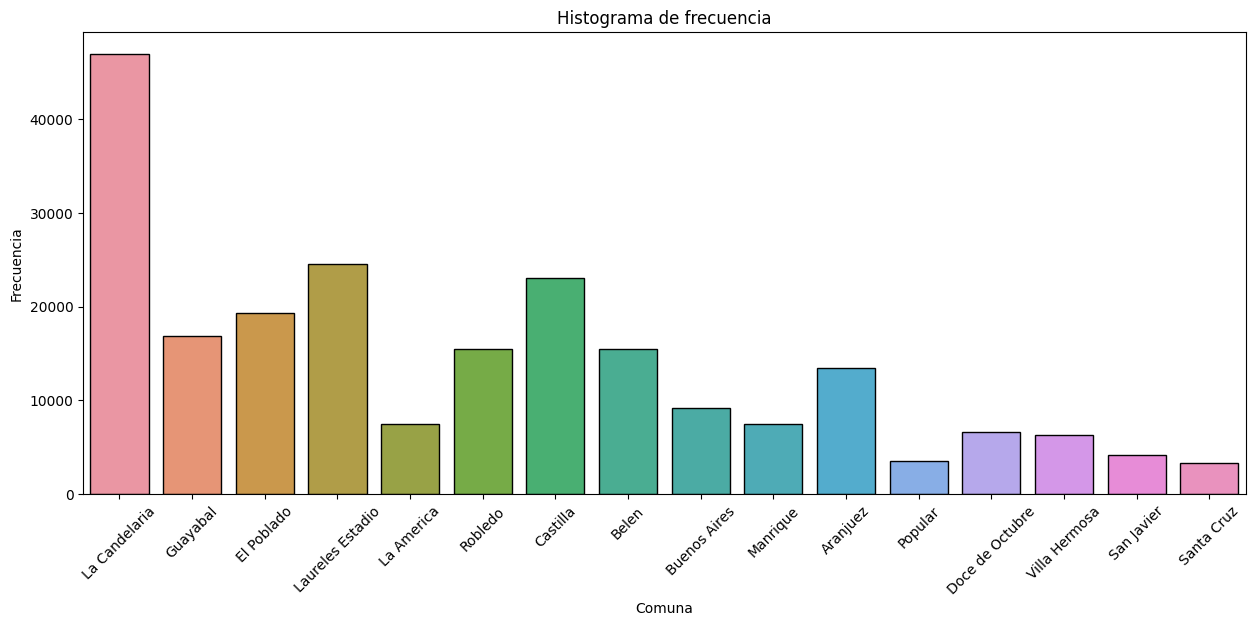

In [30]:
# HISTOGRAMA DE FRECUENCIA DE GRAVEDAD DEL ACCIDENTE
plt.figure(figsize=(7,4))
sns.countplot(x = df['GRAVEDAD_ACCIDENTE'],edgecolor = "black")
plt.ylabel('Frecuencia')
plt.xlabel('Gravedad del accidente')
plt.title('Histograma de frecuencia')

# HISTOGRAMA DE FRECUENCIA DE COMUNA
plt.figure(figsize=(15,6))
sns.countplot(x = df['COMUNA'],edgecolor = "black")
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.title('Histograma de frecuencia')
plt.xticks(rotation=45) 
plt.show()

**HISTOGRAMA PORCENTUAL DE COMUNA Y DIAGRAMA CIRCULAR DE GRAVEDAD DE LOS ACCIDENTES**

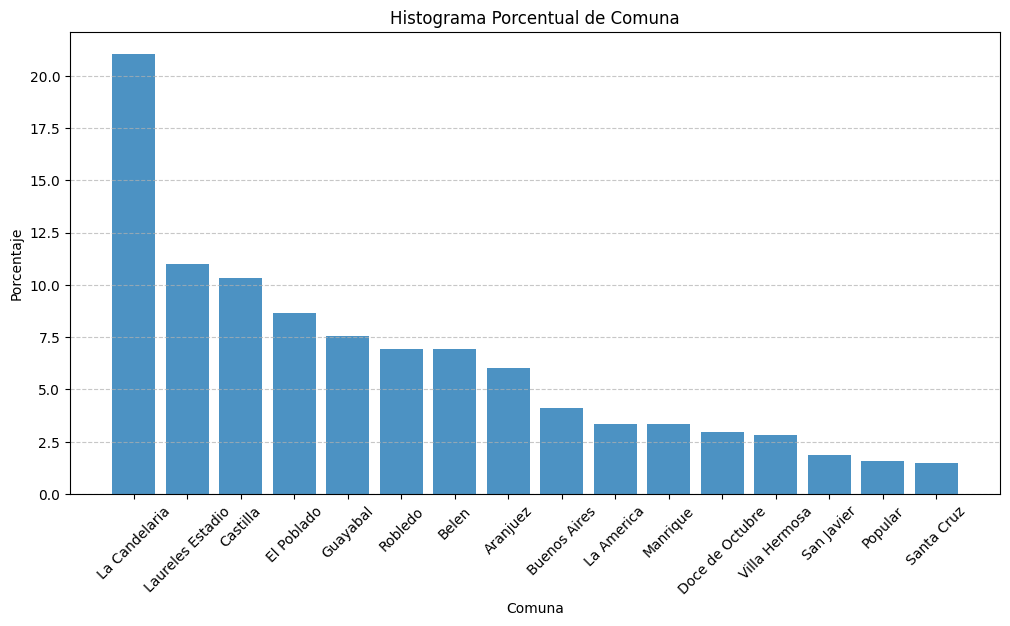

In [31]:
#HISTOGRAMA PORCENTUAL DE ACCIDENTES EN LAS COMUNAS

comuna_counts = df['COMUNA'].value_counts()

# Calcular los porcentajes de cada comuna
comuna_percentages = (comuna_counts / len(df)) * 100

# Crear el histograma porcentual
plt.figure(figsize=(12, 6))  # Tamaño de la figura
plt.bar(comuna_percentages.index, comuna_percentages.values, alpha=0.8)

# Personalizar el gráfico
plt.xlabel('Comuna')
plt.ylabel('Porcentaje')
plt.title('Histograma Porcentual de Comuna')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad

plt.show()

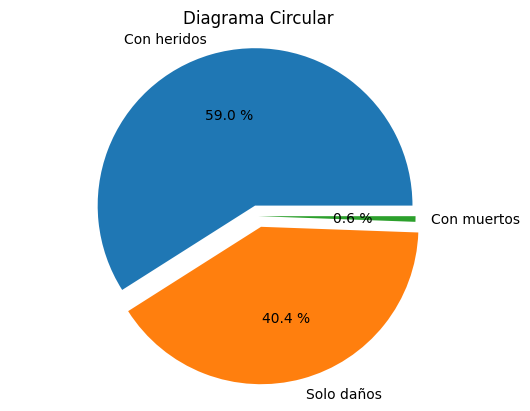

In [32]:
#DIAGRAMA CIRCULAR DE GRAVEDAD DE LOS ACCIDENTES

comuna_counts = df['GRAVEDAD_ACCIDENTE'].value_counts()
etiquetas = ['Con heridos','Solo daños', 'Con muertos']

comuna_porcentages = (comuna_counts / len(df)) * 100

desfase = (0.07, 0.07, 0)
plt.pie(comuna_porcentages, labels=etiquetas, autopct="%0.1f %%",explode=desfase)
plt.title('Diagrama Circular')
plt.axis("equal")
plt.show()

**HISTOGRAMA FRECUENCIAL Y DE BARRAS APILADAS QUE ASOCIAN LA RELACIÓN ENTRE LA GRAVEDAD DE LOS ACCIDENTES Y LAS COMUNAS**

<Figure size 2000x1000 with 0 Axes>

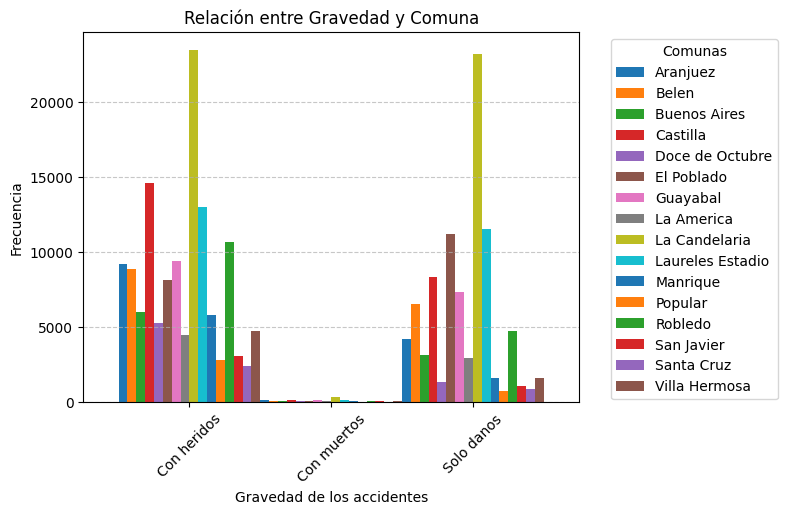

In [33]:
# Obtener las frecuencias de las distintas combinaciones de "Gravedad" y "Comuna"
grouped_df = df.groupby(['GRAVEDAD_ACCIDENTE', 'COMUNA']).size().unstack()

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(20, 10))  # Tamaño de la figura
grouped_df.plot(kind='bar', width=1, alpha=1)

# Personalizar el gráfico
plt.xlabel('Gravedad de los accidentes')
plt.ylabel('Frecuencia')
plt.title('Relación entre Gravedad y Comuna')
plt.legend(title='Comunas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad

plt.show()

<Figure size 2000x600 with 0 Axes>

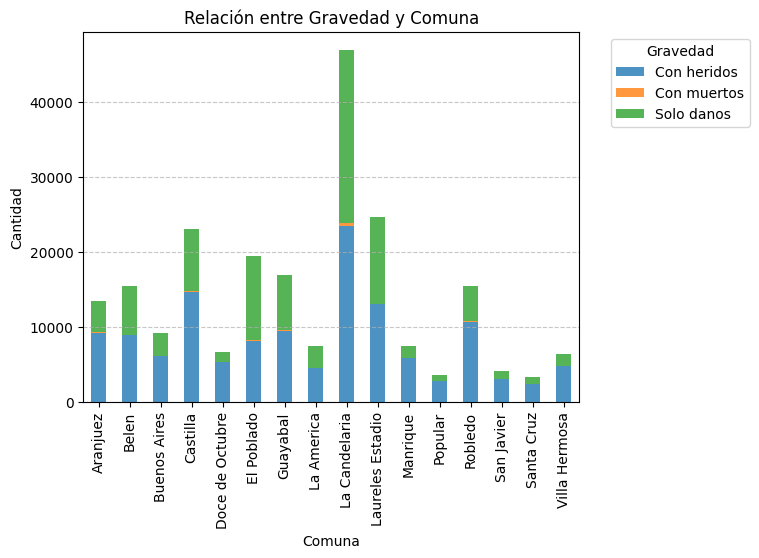

In [34]:
#HISTOGRAMA DE BARRAS APILADAS

grouped_df = df.groupby(['COMUNA', 'GRAVEDAD_ACCIDENTE']).size().unstack()

# Crear un gráfico de barras apiladas
plt.figure(figsize=(20, 6))  # Tamaño de la figura
grouped_df.plot(kind='bar', stacked=True, alpha=0.8)

# Personalizar el gráfico
plt.xlabel('Comuna')
plt.ylabel('Cantidad')
plt.title('Relación entre Gravedad y Comuna')
plt.legend(title='Gravedad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**DISTRIBUCIÓN DE LA ACCIDENTALIDAD POR MES Y AÑO**

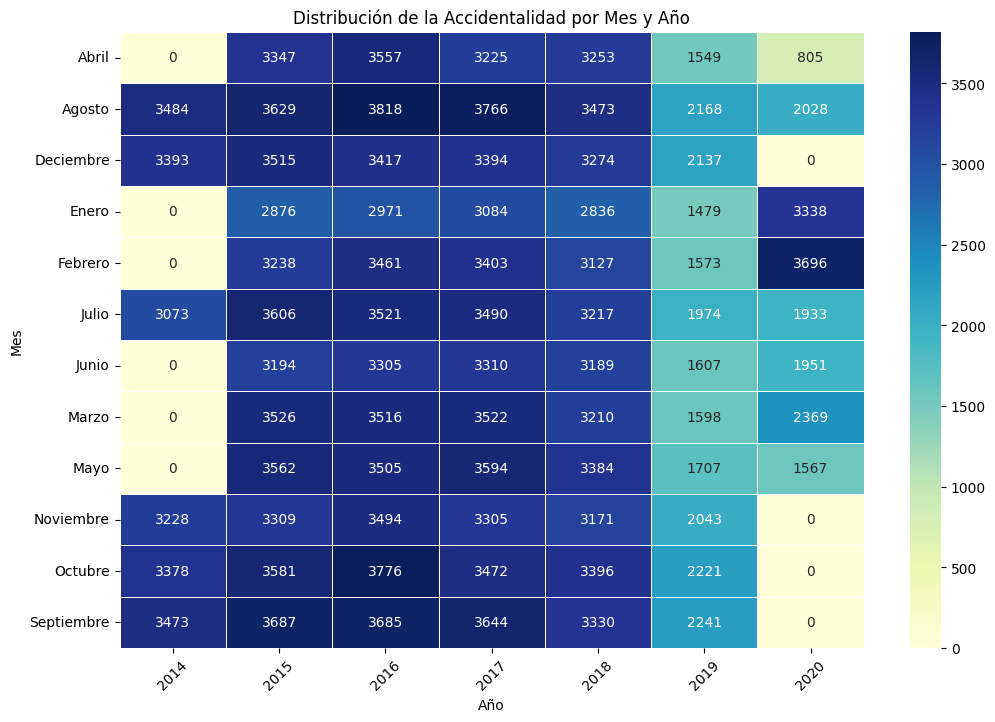

In [35]:
# Crear una tabla pivote con el recuento de accidentes por mes y año
df['Accidentes'] = 1
pivot_table = df.pivot_table(index='MES_NOMBRE', columns='ANO', values='Accidentes', aggfunc='count')
pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.astype(int)

# Crear el gráfico de heatmap
plt.figure(figsize=(12, 8))  # Tamaño de la figura
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Mes')
plt.title('Distribución de la Accidentalidad por Mes y Año')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad

plt.show()

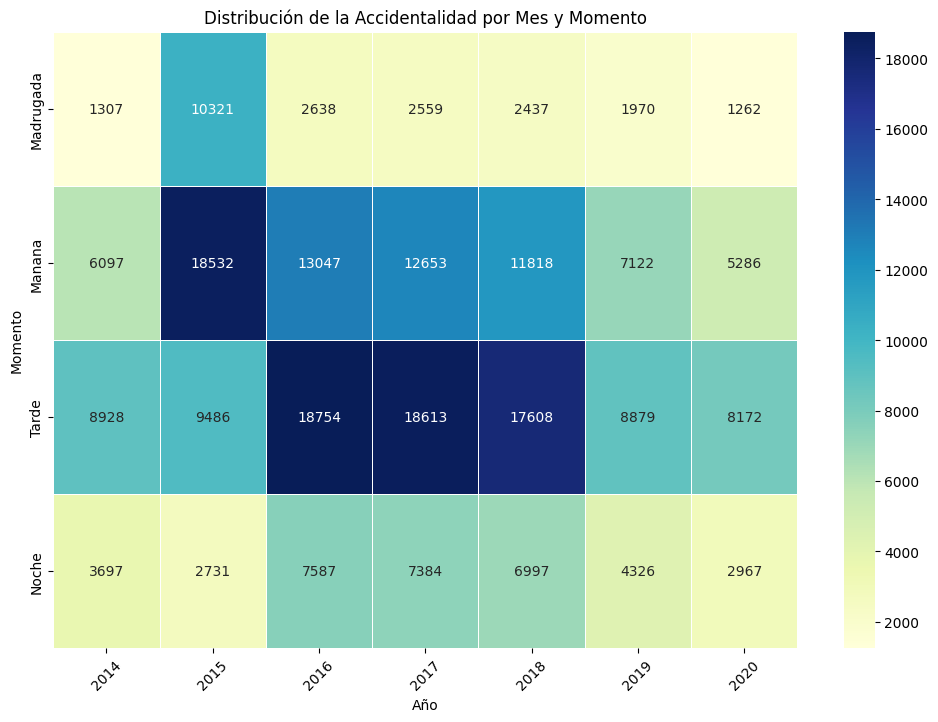

In [36]:
# Crear una tabla pivote con el recuento de accidentes por momento y año
pivot_table = df.pivot_table(index='MOMENTO', columns='ANO', values='Accidentes', aggfunc='count')
pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.astype(int)

# Crear el gráfico de heatmap
plt.figure(figsize=(12, 8))  # Tamaño de la figura
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Momento')
plt.title('Distribución de la Accidentalidad por Mes y Momento')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad

plt.show()

**REGISTRO HISTÓRICO DE ACCIDENTALIDAD POR MES Y AÑO**

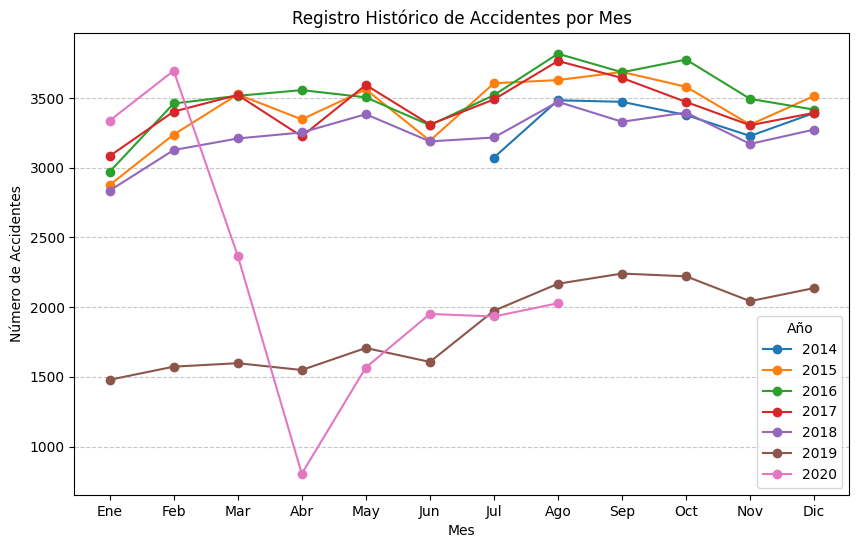

In [37]:
registro_historico = df.groupby(['ANO', 'MES'])['Accidentes'].sum().reset_index()

# Crear una figura para el gráfico
plt.figure(figsize=(10, 6))

# Recorrer cada año y dibujar una línea para el registro histórico de accidentes por mes
for year in registro_historico['ANO'].unique():
    data_by_year = registro_historico[registro_historico['ANO'] == year]
    plt.plot(data_by_year['MES'], data_by_year['Accidentes'], marker='o', label=str(year))

# Personalizar el gráfico
plt.xlabel('Mes')
plt.ylabel('Número de Accidentes')
plt.title('Registro Histórico de Accidentes por Mes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Año')

plt.show()
df = df.drop(['Accidentes'], axis=1)


# **VISUALIZACIÓN DEL COMPORTAMIENTO DE LOS DATOS EN EL TIEMPO**

In [38]:
#SEPARAMOS EL DATASET
data = df[['FECHA','GRAVEDAD_ACCIDENTE','COMUNA','MOMENTO']]
data['FECHA'] = pd.to_datetime(data['FECHA'])
data

C:\Users\Cristian\AppData\Local\Temp\ipykernel_17724\1274954585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FECHA'] = pd.to_datetime(data['FECHA'])


,FECHA,GRAVEDAD_ACCIDENTE,COMUNA,MOMENTO
10155,2014-07-04,Solo danos,La Candelaria,Manana
17488,2014-07-04,Solo danos,Guayabal,Noche
10430,2014-07-04,Solo danos,La Candelaria,Noche
15573,2014-07-04,Solo danos,El Poblado,Noche
16844,2014-07-04,Solo danos,El Poblado,Tarde
...,...,...,...,...
212825,2020-08-31,Con heridos,Villa Hermosa,Manana
217371,2020-08-31,Con heridos,La Candelaria,Manana
217372,2020-08-31,Solo danos,La Candelaria,Manana
217374,2020-08-31,Con heridos,La Candelaria,Tarde


In [39]:
#AGRUPAMOS LOS DATOS EN LA CANTIDAD DE ACCIDENTES POR FECHA(DIAS) CREANDO ASI, LA SERIE DE TIEMPO
accidentes = data.groupby('FECHA').size().reset_index(name='Accidentes')
accidentes

,FECHA,Accidentes
0,2014-07-04,23
1,2014-07-05,115
2,2014-07-06,74
3,2014-07-07,164
4,2014-07-08,116
...,...,...
2246,2020-08-27,78
2247,2020-08-28,95
2248,2020-08-29,84
2249,2020-08-30,51


Text(0, 0.5, 'Accidentes')

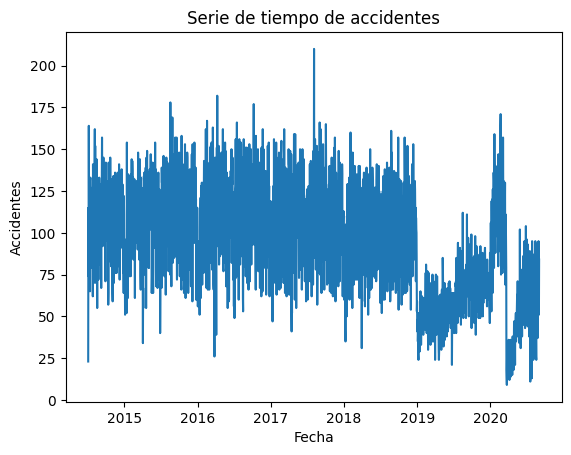

In [40]:
#VISUALIZAMOS LA SERIE DE TIEMPO
plt.plot(accidentes['FECHA'],accidentes['Accidentes'])
plt.title('Serie de tiempo de accidentes')
plt.xlabel('Fecha')
plt.ylabel('Accidentes')

*AL VISUALIZAR LA SERIE DE TIEMPO IDENTIFICAMOS UNA ANORMALIDAD EN LOS DATOS QUE REPRESENTAN UN RUIDO Y DESORIENTACIÓN, QUE A DEMÁS ESTÁ RELACIONADO CON LA PANDEMIA. POR ESO MISMO SE TOMA LA DECISIÓN DE ELIMINAR ESTA ZONA.*

**DESCOMPOSICION DE LA SERIE DE TIEMPO**

(array([16252., 16436., 16617., 16801., 16983., 17167., 17348., 17532.,
        17713., 17897.]),
 [Text(16252.0, 0, '2014-07'),
  Text(16436.0, 0, '2015-01'),
  Text(16617.0, 0, '2015-07'),
  Text(16801.0, 0, '2016-01'),
  Text(16983.0, 0, '2016-07'),
  Text(17167.0, 0, '2017-01'),
  Text(17348.0, 0, '2017-07'),
  Text(17532.0, 0, '2018-01'),
  Text(17713.0, 0, '2018-07'),
  Text(17897.0, 0, '2019-01')])

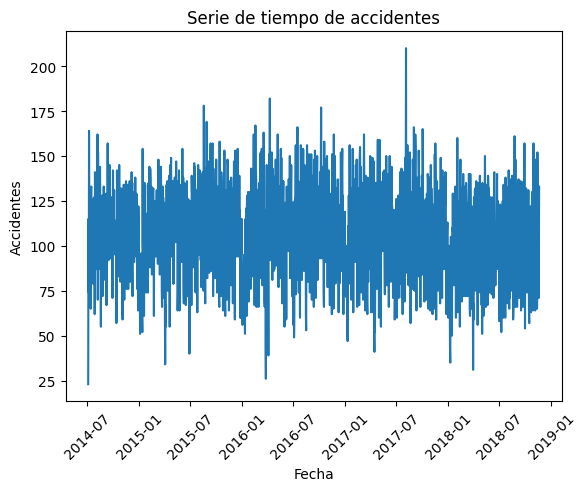

In [41]:
#ELIMINAMOS LA ZONA QUE NO INTERESA
accidentes = accidentes[:1600]
plt.plot(accidentes['FECHA'],accidentes['Accidentes'])
plt.title('Serie de tiempo de accidentes')
plt.xlabel('Fecha')
plt.ylabel('Accidentes')
plt.xticks(rotation=45)


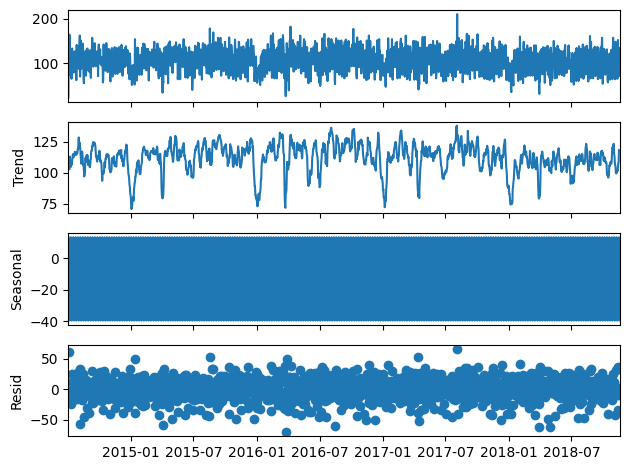

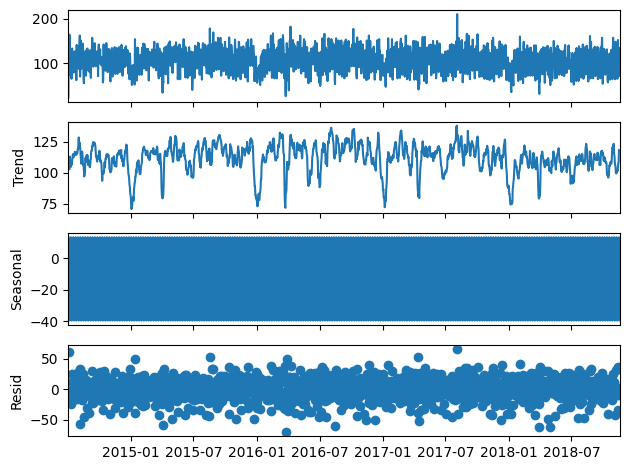

In [42]:
# DESCOMPOSICION DE LA SERIE DE TIEMPO

from statsmodels.tsa.seasonal import seasonal_decompose
dat = accidentes.copy()
dat.set_index('FECHA', inplace=True)
decompose_data = seasonal_decompose(dat, model="additive")
decompose_data.plot()

*EN LAS VISUALIZACIONES ANTERIORES, OBSERVAMOS QUE LA SERIE TIENE UN COMPORTAMIENTO SECUENCIAL, ESTACIONARIO DONDE NO EXISTE UNA TENDENCIA MARCADA. SIN EMBARGO, VERIFICAMOS CON EL TEST DE DICKEY FULLER*

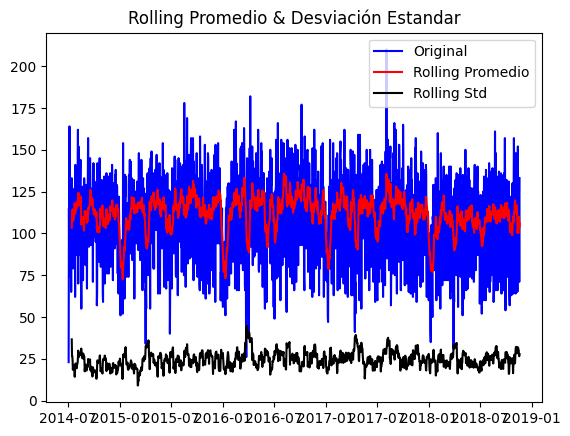

Resultados de Dickey-Fuller Test:
Test Statistic                -7.029663e+00
p-value                        6.232582e-10
#Lags Used                     2.300000e+01
Number of Observations Used    1.576000e+03
Critical Value (1%)           -3.434506e+00
Critical Value (5%)           -2.863376e+00
Critical Value (10%)          -2.567747e+00
dtype: float64


In [43]:
#CREAMOS UNA FUNCIÓN QUE NOS PERMITE CONOCER LAS COMPONENTES ESTADISTICAS DE LA SERIE Y RESUTADOS DEL TEST DE DICKEY-FULLER

from statsmodels.tsa.stattools import adfuller

def test_estacionaridad(timeseries):  
    # Estadisticas Rolling  
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    # Graficando estadisticas Rolling
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Promedio')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Promedio & Desviación Estandar')
    plt.show(block=False)
    
    # Test Dickey-Fuller
    print ('Resultados de Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
timeseries = accidentes.copy()
timeseries.set_index('FECHA', inplace=True)
test_estacionaridad(timeseries)

*ESTADISTICAMENTE UNA SERIE SE CONSIDERA ESTACIONARIA SI EL VALOR DE 'TEST STATISTIC' ES MAS PEQUEÑO QUE LOS VALORES 'CRITICAL' Y ESTE SI ES EL CASO. POR LO TANTO, CONSIDERAMOS QUE ES UNA SERIE ESTACIONARIA.*

**IDENTIFICAMOS Y TRATAMOS LOS OUTLIERS**

In [44]:
accidentes.FECHA = pd.to_datetime(accidentes.FECHA)
accidentes.set_index('FECHA', inplace=True)
accidentes.shape

C:\Users\Cristian\AppData\Local\Temp\ipykernel_17724\699619515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidentes.FECHA = pd.to_datetime(accidentes.FECHA)


(1600, 1)

In [161]:
px.line(accidentes)

(array([16252., 16436., 16617., 16801., 16983., 17167., 17348., 17532.,
        17713., 17897.]),
 [Text(16252.0, 0, '2014-07'),
  Text(16436.0, 0, '2015-01'),
  Text(16617.0, 0, '2015-07'),
  Text(16801.0, 0, '2016-01'),
  Text(16983.0, 0, '2016-07'),
  Text(17167.0, 0, '2017-01'),
  Text(17348.0, 0, '2017-07'),
  Text(17532.0, 0, '2018-01'),
  Text(17713.0, 0, '2018-07'),
  Text(17897.0, 0, '2019-01')])

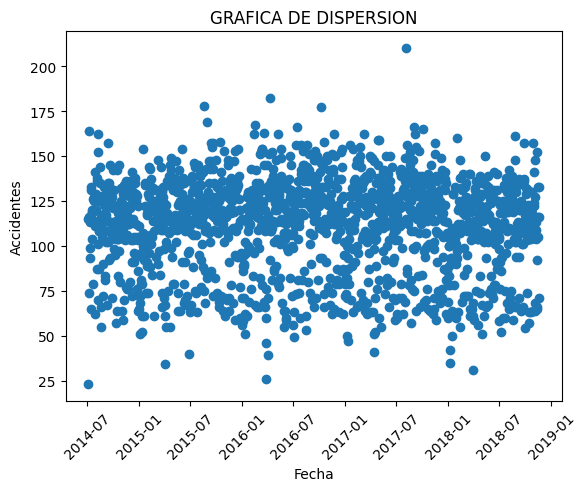

In [45]:
#EN ESTE DIAGRAMA DE DISPERSIÓN OBSERVAMOS UNOS OUTLIERS, APLICAMOS TÉCNICAS PARA TRATARLOS
plt.scatter(accidentes.index,accidentes.Accidentes)
plt.title('GRAFICA DE DISPERSION')
plt.xlabel('Fecha')
plt.ylabel('Accidentes')
plt.xticks(rotation=45)

In [46]:
#IDENTIFICAMOS QUE LOS OUTLIERS SE ENCUENTRAN POR FUERA DE LOS LIMITES(lineas rojas) ESTABLECIDOS ESTADISTICAMENTE

# Calcular media y límites
mean_alturas = accidentes.Accidentes.mean()
std_alturas = accidentes.Accidentes.std()
lim_inf = mean_alturas - 2.5*std_alturas
lim_sup = mean_alturas + 2.5*std_alturas

# Dibujar distribución y superponer los límites
fig = px.histogram(accidentes, width=800, height=400)
fig.add_vline(x=mean_alturas, line_color='black')
fig.add_vline(x=lim_inf, line_color='red')
fig.add_vline(x=lim_sup, line_color='red')
fig.show()

In [48]:
#IDENTIFICAMOS LOS CUARTILES Y LOS GRAFICAMOS EN LA GRAFICA DE DISPERSION

qs = accidentes.quantile([0.25,0.5,0.75]).values
q1 = qs[0][0]
q2 = qs[1][0]
q3 = qs[2][0]

# Y dibujarlos superpuestos a los datos
fig = px.scatter(accidentes, width=1200, height=350)
fig.add_hline(y=q2, line_color='black', annotation_text='q2')
fig.add_hline(y=q1, line_color='red', annotation_text='q1')
fig.add_hline(y=q3, line_color='red', annotation_text='q3')

fig.show()

In [49]:
#IDENTIFICAMOS LOS OUTLIERS EN EL DIAGRAMA DE CAJA, ESTOS SE ENCUENTRAN FUERA DE LOS RANGOS INTERCUARTILICOS
fig = px.box(accidentes, width = 600, height=400)
fig.show()

In [50]:
#Realizamos un Capped a los datos, donde los valores que estén por fuera del rango asignado, se convierten en ese valor limite.

# Definir límites inferior y superior
iqr = q3-q1
iqr_lim_inf = q1 - 1.5*iqr
iqr_lim_sup = q3 + 1.5*iqr

# Y realizar el recorte
accidentes['Capped'] = accidentes['Accidentes']
accidentes['Capped'] = np.where(accidentes['Capped']>iqr_lim_sup,
                                 iqr_lim_sup, accidentes['Capped'])
accidentes['Capped'] = np.where(accidentes['Capped']<iqr_lim_inf,
                                 iqr_lim_inf, accidentes['Capped'])

# Dibujar boxplots original y "capped"
fig = px.box(accidentes, width = 600, height=400)
fig.show()

C:\Users\Cristian\AppData\Local\Temp\ipykernel_17724\3294294261.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Cristian\AppData\Local\Temp\ipykernel_17724\3294294261.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Cristian\AppData\Local\Temp\ipykernel_17724\3294294261.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [51]:
#OBSERVAMOS LA TRANSFORMACION REALIZADA
px.line(accidentes)

(array([16252., 16436., 16617., 16801., 16983., 17167., 17348., 17532.,
        17713., 17897.]),
 [Text(16252.0, 0, '2014-07'),
  Text(16436.0, 0, '2015-01'),
  Text(16617.0, 0, '2015-07'),
  Text(16801.0, 0, '2016-01'),
  Text(16983.0, 0, '2016-07'),
  Text(17167.0, 0, '2017-01'),
  Text(17348.0, 0, '2017-07'),
  Text(17532.0, 0, '2018-01'),
  Text(17713.0, 0, '2018-07'),
  Text(17897.0, 0, '2019-01')])

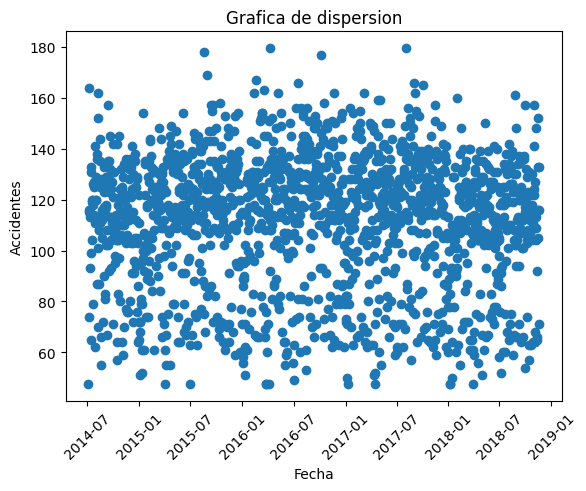

In [52]:
#VERIFICAMOS EN LA GRAFICA DE DISPERSION QUE QUE YA NO HAYAN OUTLIER
plt.scatter(accidentes.index,accidentes.Capped)
plt.title('Grafica de dispersion')
plt.xlabel('Fecha')
plt.ylabel('Accidentes')
plt.xticks(rotation=45)

In [170]:
#GUARDAMOS LA SERIE DE TIEMPO PROCESADA
accidentes.to_csv('accidentes.csv') 